In [1]:
import glob, os
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

DATA_ROOT_PATH = "../szczury/better_data/"

# Data Loading # 

In [2]:
labels = pd.read_csv(DATA_ROOT_PATH + 'dlaUJ_VPAmodel_koh3_tickling_20190328.txt', delimiter="\t", index_col='Selection')

labels.drop(labels[labels['USV TYPE'] == '22-kHz'].index, inplace=True)
labels.drop(labels[labels['USV TYPE'] == '22-kHz call'].index, inplace=True)

labels.head(10)

,View,Channel,Begin Time (s),End Time (s),Delta Time (s),Low Freq (Hz),High Freq (Hz),Center Freq (Hz),Peak Freq (Hz),Begin File,Delta Freq (Hz),USV TYPE
Selection,,,,,,,,,,,,
11,Spectrogram 1,1,11.246246,11.258952,0.013,83817.8,85998.1,84472.7,84472.7,ch1-2018-11-20_10-17-43_0000004.wav,2180.3,SH
14,Spectrogram 1,1,13.461827,13.472159,0.010,67102.7,71649.5,69335.9,69335.9,ch1-2018-11-20_10-17-43_0000004.wav,4546.8,SH
18,Spectrogram 1,1,18.289071,18.300751,0.012,89874.0,92781.0,91308.6,91308.6,ch1-2018-11-20_10-17-43_0000004.wav,2907.0,SH
22,Spectrogram 1,1,21.372682,21.384646,0.012,95445.7,99564.0,96679.7,96679.7,ch1-2018-11-20_10-17-43_0000004.wav,4118.3,SH
23,Spectrogram 1,1,21.884120,21.891757,0.008,93507.8,96657.0,95214.8,94726.6,ch1-2018-11-20_10-17-43_0000004.wav,3149.2,SH
24,Spectrogram 1,1,22.433316,22.438707,0.005,72572.8,75970.9,74707.0,74707.0,ch1-2018-11-20_10-17-43_0000004.wav,3398.1,SH
29,Spectrogram 1,1,34.835034,34.868110,0.033,51841.1,56928.3,55664.1,56152.3,ch1-2018-11-20_10-17-43_0000004.wav,5087.2,FM
34,Spectrogram 1,1,38.742444,38.760741,0.018,40213.2,43846.9,42968.8,42968.8,ch1-2018-11-20_10-17-43_0000004.wav,3633.7,FM
39,Spectrogram 1,1,44.550626,44.570330,0.020,49903.1,56443.8,55175.8,55175.8,ch1-2018-11-20_10-17-43_0000004.wav,6540.7,FM


In [3]:
labels['USV TYPE'].unique()

array(['SH', 'FM', 'RP', 'FL', 'ST', 'CMP', 'IU', 'TR', 'RM'],
      dtype=object)

In [4]:
assert os.path.exists(DATA_ROOT_PATH)

wavs = sorted(glob.glob(f"{DATA_ROOT_PATH}/*.wav"))

for wav in wavs:
    print(wav)

../szczury/better_data\ch1-2018-11-20_10-17-43_0000004.wav
../szczury/better_data\ch1-2018-11-20_10-20-34_0000006.wav
../szczury/better_data\ch1-2018-11-20_10-23-08_0000008.wav
../szczury/better_data\ch1-2018-11-20_10-26-36_0000010.wav
../szczury/better_data\ch1-2018-11-20_10-29-02_0000012.wav
../szczury/better_data\ch1-2018-11-20_10-31-42_0000014.wav
../szczury/better_data\ch1-2018-11-20_10-37-25_0000017.wav
../szczury/better_data\ch1-2018-11-20_10-39-58_0000019.wav
../szczury/better_data\ch1-2018-11-20_10-42-38_0000021.wav


## Calculate audio file offsets in data file ##

In [5]:
offsets, total_offset = {}, 0.0

for wav in wavs:
    name = os.path.basename(wav)
    duration = librosa.get_duration(filename=wav)
    print(f"{name}: {total_offset:.4f}s")
    offsets[name] = total_offset
    total_offset += duration
    
# print(offsets)

ch1-2018-11-20_10-17-43_0000004.wav: 0.0000s
ch1-2018-11-20_10-20-34_0000006.wav: 120.0049s
ch1-2018-11-20_10-23-08_0000008.wav: 240.0098s
ch1-2018-11-20_10-26-36_0000010.wav: 360.0147s
ch1-2018-11-20_10-29-02_0000012.wav: 480.0196s
ch1-2018-11-20_10-31-42_0000014.wav: 600.0245s
ch1-2018-11-20_10-37-25_0000017.wav: 720.0294s
ch1-2018-11-20_10-39-58_0000019.wav: 840.0343s
ch1-2018-11-20_10-42-38_0000021.wav: 960.0392s


In [6]:
labels['Relative Begin Time (s)'] = labels.apply (
    lambda row: row['Begin Time (s)'] - offsets[row['Begin File']],
    axis=1)

labels['Relative End Time (s)'] = labels.apply (
    lambda row: row['End Time (s)'] - offsets[row['Begin File']],
    axis=1
)

In [7]:
labels.tail()

,View,Channel,Begin Time (s),End Time (s),Delta Time (s),Low Freq (Hz),High Freq (Hz),Center Freq (Hz),Peak Freq (Hz),Begin File,Delta Freq (Hz),USV TYPE,Relative Begin Time (s),Relative End Time (s)
Selection,,,,,,,,,,,,,,
2845,Spectrogram 1,1,1078.783906,1078.791993,0.008,59291.6,67248.5,65918.0,65918.0,ch1-2018-11-20_10-42-38_0000021.wav,7956.9,RP,118.744738,118.752825
2846,Spectrogram 1,1,1079.182703,1079.224033,0.041,53644.8,66221.8,62988.3,62500.0,ch1-2018-11-20_10-42-38_0000021.wav,12577.0,TR,119.143535,119.184865
2847,Spectrogram 1,1,1079.494477,1079.547487,0.053,53131.4,69301.8,65429.7,62988.3,ch1-2018-11-20_10-42-38_0000021.wav,16170.4,TR,119.455309,119.508319
2848,Spectrogram 1,1,1079.715935,1079.757266,0.041,51848.0,67505.1,63476.6,62500.0,ch1-2018-11-20_10-42-38_0000021.wav,15657.1,TR,119.676767,119.718098
2849,Spectrogram 1,1,1079.938759,1079.969308,0.031,51334.7,63655.0,61523.4,61523.4,ch1-2018-11-20_10-42-38_0000021.wav,12320.3,TR,119.899591,119.930140


## Show single annotation ##

In [8]:
%matplotlib inline
# https://towardsdatascience.com/audio-classification-using-fastai-and-on-the-fly-frequency-transforms-4dbe1b540f89

def get_audio(path):
    if path not in get_audio.cache:
        get_audio.cache[path] = librosa.load(path, sr=None)
    return get_audio.cache[path]
get_audio.cache = {}


def show_single_marker(row, n_fft=512, hop_length=128, ax=None, verbose=False):
    if verbose:
        print(row)
    path = f"{DATA_ROOT_PATH}/{row['Begin File']}"
    
    y, sr = get_audio(path)
    assert sr == 250000
    
    start_frame = int(row['Relative Begin Time (s)'] * sr)
    end_frame = int(row['Relative End Time (s)'] * sr)
    
    stft = librosa.stft(y[start_frame: end_frame], n_fft=n_fft, hop_length=hop_length)

    D = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

    librosa.display.specshow(D, y_axis=None, x_axis=None, sr=sr, hop_length=hop_length, ax=ax)

## Display sample markers for each 'USV TYPE' ##

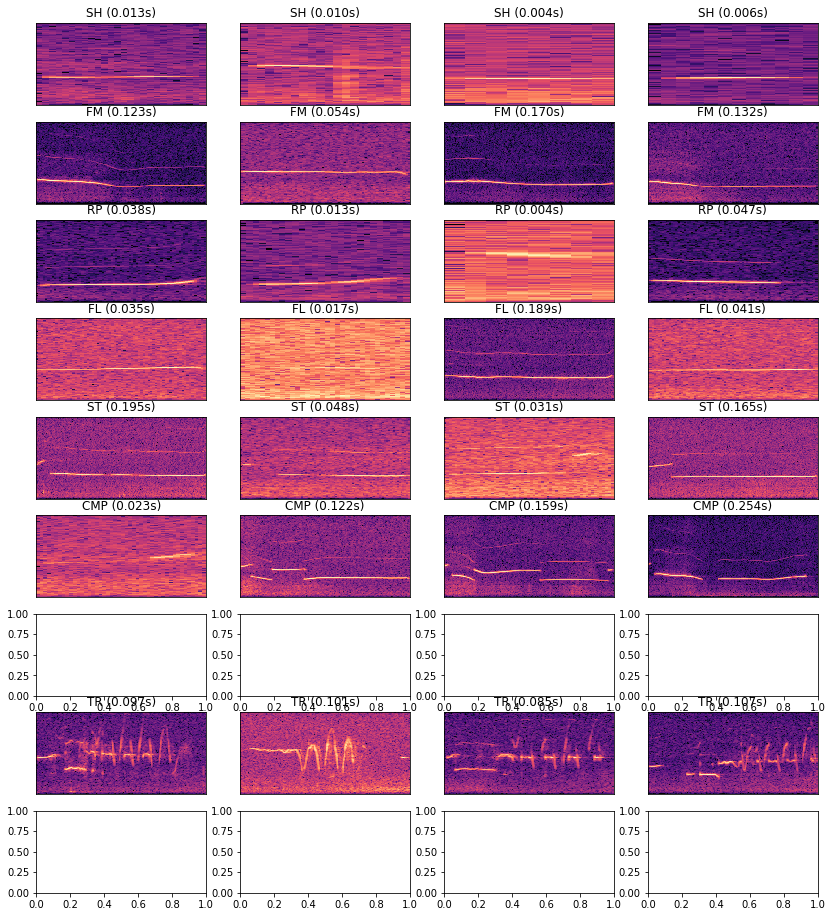

In [9]:
SOURCE_FILE = 'ch1-2018-11-20_10-31-42_0000014.wav'
USV_TYPES = ['SH', 'FM', 'RP', 'FL', 'ST', 'CMP', 'IU', 'TR', 'RM']


fig, axes = plt.subplots(len(USV_TYPES), 4, figsize=(14, 16))

for ax_row, usv_type in zip(axes, USV_TYPES):
    rows = labels[
        (labels['Begin File'] == SOURCE_FILE) & 
        (labels['USV TYPE'] == usv_type)]

    for ax, (idx, row) in zip(ax_row, itertools.islice(rows.iterrows(), 4)):
        show_single_marker(row, ax=ax)
        ax.set_title(f"{usv_type} ({row['Delta Time (s)']:.3f}s)")
        
# plt.colorbar(format='%+2.0f dB',)


## Generating labels ##

In [10]:
def extract_audio_frames(audio_name, data, n_fft=1024, hop_length=256):
    audio_data, sr = get_audio(f"{DATA_ROOT_PATH}/{audio_name}")
    
    def t2f(time):
        return librosa.core.time_to_frames(time, sr=sr, hop_length=hop_length, n_fft=n_fft)

    stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=256)
    stft = np.abs(np.moveaxis(stft, 0, -1))
    
    frames_labels = np.array([None]*stft.shape[0])
    for idx, row in data[data['Begin File'] == audio_name].iterrows():
        start = t2f(row['Relative Begin Time (s)'])
        end = t2f(row['Relative End Time (s)'])

        # WARNING: add some offset to range boundaries ???
        frames_labels[start:end] = row['USV TYPE']
        
    return stft, frames_labels


In [11]:
X, y = extract_audio_frames(SOURCE_FILE, labels)
print(X.shape, y.shape)

(117193, 513) (117193,)


## Display single frame ##

None 71272
SH 73
FM 11567
RP 139
FL 4679
ST 12010
CMP 6973
IU 0
TR 10480
RM 0


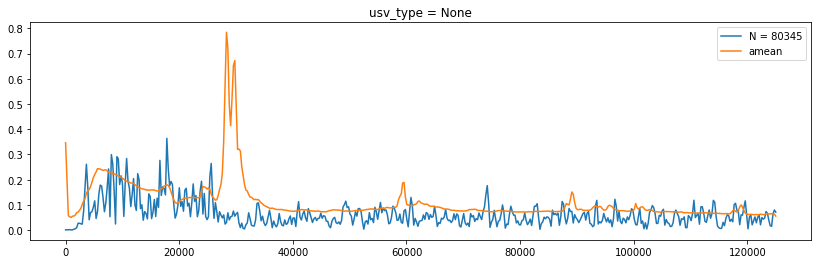

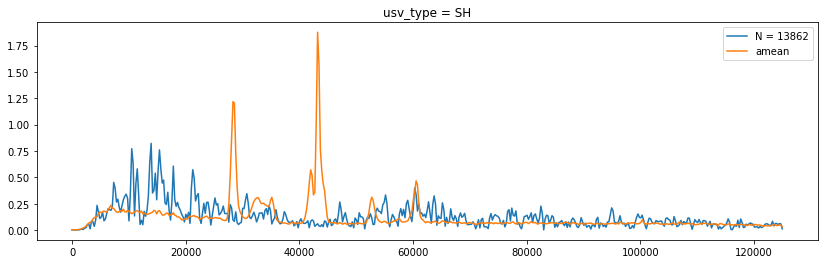

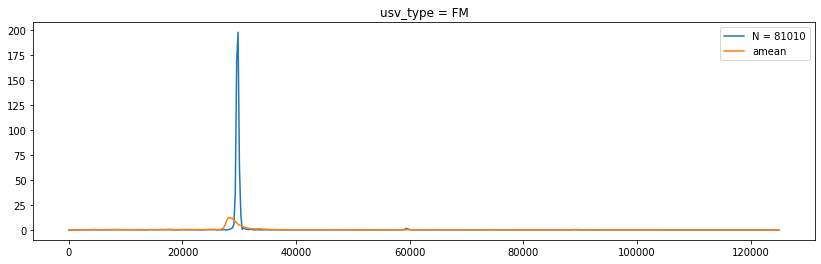

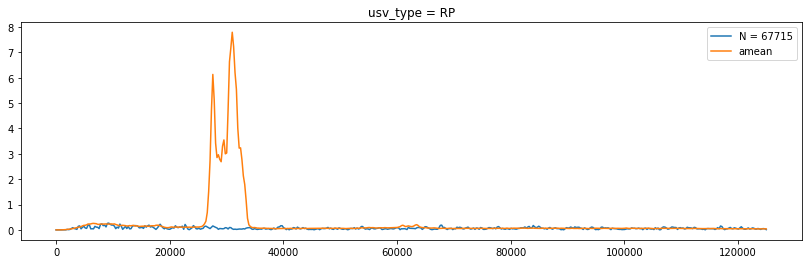

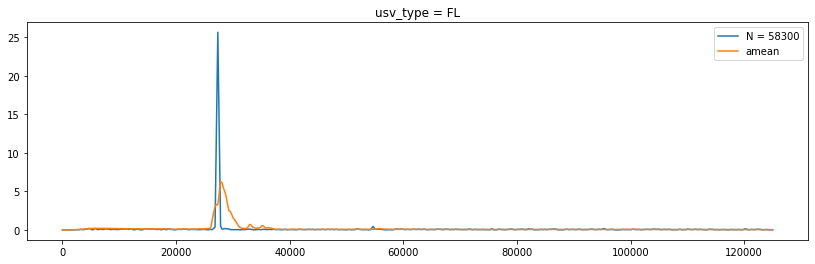

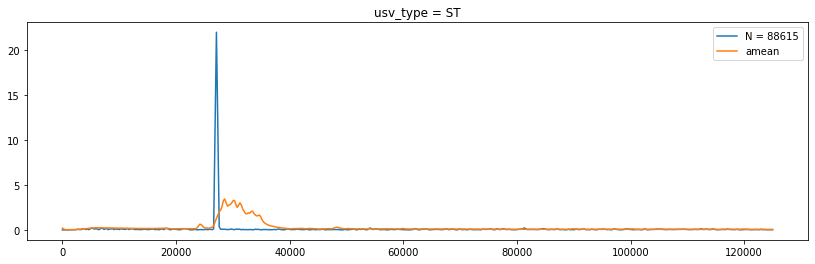

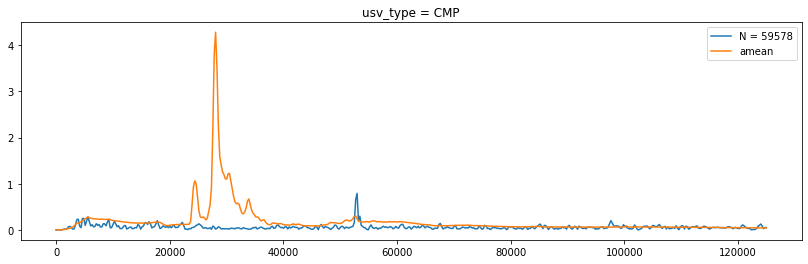

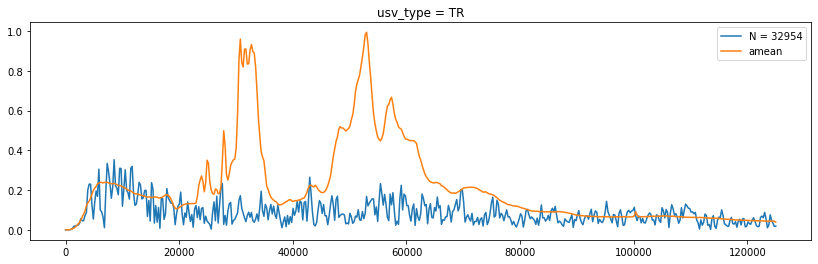

In [12]:
%matplotlib inline


def show_frame(usv_type):
    idx = np.argwhere(y == usv_type).reshape(-1)
    print(usv_type, idx.size)
    
    if not idx.size:
        return 
    
    x_hz = librosa.core.fft_frequencies(250000, 1024)
    
    # display single sample of usv_type
    N = np.random.choice(idx)
    plt.figure(figsize=(14,4))
    sns.lineplot(x_hz, X[N], label=f"N = {N}").set_title(f"usv_type = {usv_type}")
    
    # display average for given usv_type
    avg = np.mean(X[idx], axis=0)
    sns.lineplot(x_hz, avg, label='amean')


for usv_type in [None] + USV_TYPES:
    show_frame(usv_type)

## Save FFTs and labels ##

In [13]:
print(X.dtype, y.dtype)

float32 object


In [14]:
print(X.shape, y.shape)

np.savez('dataset.npz', X=X, y=y)

!wc dataset.npz

(117193, 513) (117193,)


'wc' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
"""grip all data"""
assert os.path.exists(DATA_ROOT_PATH)

wavs = sorted(glob.glob(f"{DATA_ROOT_PATH}/*.wav"))

X, y = extract_audio_frames(wavs[0][23:], labels)
for i in range(1, len(wavs)):
    wav_X, wav_y = extract_audio_frames(wavs[i][23:], labels)
    X = np.concatenate((X, wav_X), axis=0)
    y = np.concatenate((y, wav_y), axis=0)

In [16]:
"""print number of element per type"""
type_nubers = []
for usv_type in USV_TYPES:
    size = np.argwhere(y == usv_type).reshape(-1).size
    print(usv_type, size)
    type_nubers += [size]

mean_sample = np.int64(np.mean(type_nubers));
print("MEAN", mean_sample)

SH 2206
FM 35414
RP 4125
FL 15882
ST 37234
CMP 29113
IU 627
TR 33445
RM 41
MEAN 17565


In [17]:
print(X.shape, y.shape)

(1054737, 513) (1054737,)


In [18]:


def get_sample(usv_type, sample_size, X, y):
    idx = np.argwhere(y == usv_type).reshape(-1)
    randint_array = np.random.randint(idx.size, size=sample_size)
    sample_idx = idx[randint_array]
    return (X[sample_idx], y[sample_idx])

In [19]:
"""Create Sampled dataset"""

mean_sample = 200
new_X, new_y = get_sample(None, mean_sample, X, y)
for usv_type in USV_TYPES:
    type_sample_X, type_sample_y = get_sample(usv_type, mean_sample, X, y)
    new_X = np.concatenate((new_X, type_sample_X), axis=0)
    new_y = np.concatenate((new_y, type_sample_y), axis=0)

In [20]:
X, y = new_X, new_y

print(X.shape, y.shape)

(2000, 513) (2000,)


In [21]:
k = 3
train_size = np.int64(((k - 1) * y.size / k))
print(f"train_size: {train_size}")

train_size: 1333


In [22]:
"""Map to integer labels"""
dict_types = {None: 0,
             'SH': 1,
             'FM': 2,
             'RP': 3,
             'FL': 4,
             'ST': 5,
             'CMP': 6,
             'IU': 7,
             'TR': 8,
             'RM': 9}

y = list(map(lambda x: dict_types[x], y))
y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn import  metrics

In [28]:
"""try to classify"""

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

svr.fit(X[:train_size], y[:train_size])

yHood = svr.predict(X[train_size:])

acc = 100 * len([a for (a, b) in zip(y[train_size:], yHood) if a == b]) / len(yHood)
print(f"SVR acc:{acc}%")
    

D:\Miniconda3\envs\ml19\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVR acc:0.0%


In [29]:
yHood

array([3.33594711, 3.33594695, 3.33594711, 3.42596518, 3.31388646,
       3.33594711, 3.33814974, 3.33594711, 0.93754694, 3.33594711,
       3.33594711, 3.33594711, 3.33521399, 3.33594711, 3.33594711,
       3.33187375, 1.21829185, 3.33595708, 3.98431375, 3.34114214,
       3.33594711, 2.11995883, 3.33594711, 3.3357724 , 2.77142817,
       3.31928382, 3.33594711, 3.33594711, 1.26833601, 3.09517334,
       3.33594711, 1.62417348, 3.3212035 , 3.33824822, 3.33594695,
       3.08805974, 3.32816887, 3.33598731, 3.33594711, 3.33594711,
       3.18414293, 3.33594711, 3.33594711, 2.0299524 , 3.33594711,
       3.33594713, 3.24784613, 3.12938936, 3.3428348 , 3.33594711,
       3.33594711, 0.75944643, 3.31771616, 3.33588507, 3.35097152,
       3.2474676 , 3.33594771, 3.33458352, 2.92087197, 3.33594711,
       1.13878343, 3.33594711, 3.30507852, 1.55792295, 3.33594711,
       3.33594711, 3.33594711, 3.31512298, 3.33949339, 3.33594711,
       3.33594711, 3.33594711, 3.33594578, 3.33594711, 3.25495

In [ ]:
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
kr.fit(X[:train_size], y[:train_size])

yHood = kr.predict(X[train_size:])

acc = 100 * len([a for a, b in zip(y[train_size:], yHood) if a == b]) / len(yHood)
print(f"KernelRidge acc:{acc}%")

## TODO: Masking training ##

# Work in progress #


In [ ]:
assert False

In [ ]:

y, sr = librosa.load(wavs[0], sr=None)

In [ ]:
print('sampling rate:', sr)
print(y.shape)

In [ ]:
%matplotlib inline 

#y.shape, sr
# 22050*120
stft = librosa.stft(y[:1000000], n_fft=512, hop_length=256)
print(stft.shape)
# x_labels = 
# print(stft[:,1000])

# plt.figure(figsize=(12,8))
# sns.lineplot(range(257), np.abs(stft[:,1000]))

In [ ]:
%matplotlib inline

D = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
print(D.shape)
plt.figure(figsize=(12,8))
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, hop_length=256)
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

In [ ]:
import matplotlib.pyplot as plt

plt.specgram(y,Fs=sr)